In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/dianakorka/Big-Scale-Predict-Difficulty-French-Text/main/Data/labelledData.csv', sep=",")
df.head()

,Text,Difficulty
0,"Je maîtrise le fonctionnement de ce logiciel, ...",B1
1,Une équipe médicale mène une étude sur la ciga...,B1
2,"Je vois bien l'intérêt de cet appareil, mais j...",B1
3,Ils auraient très vite envie de partir en voya...,B1
4,Nous somment conscients de la difficulté de l'...,B1


In [ ]:
df.groupby('Difficulty').count().Text

Difficulty
A1    174
A2    181
B1    151
B2     88
C1    304
C2    102
Name: Text, dtype: int64

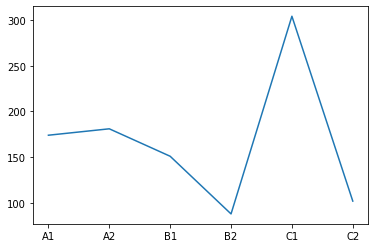

In [ ]:
plt.plot(df.groupby('Difficulty').count().Text);

In [ ]:
import seaborn as sns


In [ ]:
df.shape

(1000, 2)

In [ ]:
df[df.duplicated() == True]

,Text,Difficulty
375,L’accident a provoqué une fuite de 15 000 tonn...,B1
378,"L’usine appartient au groupe Norilsk Nickel, l...",A2
410,"Mais selon les autorités, la progression des h...",A2
630,La prof de sciences est absente demain.,A1
908,"Jeune retraité de l’éducation nationale, Roger...",C2


In [ ]:
df.Text.unique().shape

(995,)

We discovered we have 5 duplicates, so we added more sentences to our dataset of the B2 level, which is the least well represented one.

In [ ]:
df['Length'] = df.Text.str.len()
df.head()

,Text,Difficulty,Length
0,"Je maîtrise le fonctionnement de ce logiciel, ...",B1,84
1,Une équipe médicale mène une étude sur la ciga...,B1,104
2,"Je vois bien l'intérêt de cet appareil, mais j...",B1,68
3,Ils auraient très vite envie de partir en voya...,B1,83
4,Nous somment conscients de la difficulté de l'...,B1,89


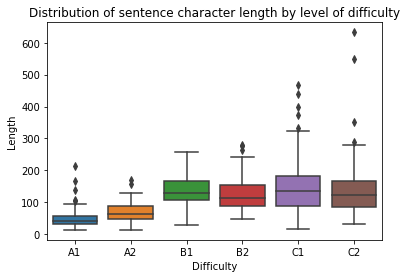

In [ ]:
sns.boxplot(x='Difficulty', y='Length', data=df, order=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.title('Distribution of sentence character length by level of difficulty');

In [ ]:
df['totalwords'] = df['Text'].str.split().str.len()

In [ ]:
df.head()

,Text,Difficulty,Length,totalwords
0,"Je maîtrise le fonctionnement de ce logiciel, ...",B1,84,14
1,Une équipe médicale mène une étude sur la ciga...,B1,104,17
2,"Je vois bien l'intérêt de cet appareil, mais j...",B1,68,13
3,Ils auraient très vite envie de partir en voya...,B1,83,16
4,Nous somment conscients de la difficulté de l'...,B1,89,14


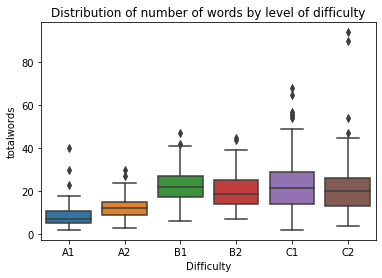

In [ ]:
sns.boxplot(x='Difficulty', y='totalwords', data=df, order=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.title('Distribution of number of words by level of difficulty');

In [ ]:
!pip install wordstats

In [ ]:
# Formulla for generating cognates
from wordstats import LanguageInfo
from wordstats.common_words import common_words
French = LanguageInfo.load("fr")
English = LanguageInfo.load("en")
for each in French.all_words():
    if each in English.all_words():
        if len(each) > 10 and each not in common_words():
             print(each)

mademoiselle
conversation
intelligent
information
surveillance
proposition
imagination
communication
instructions
intelligence
intervention
thanksgiving
destruction
association
construction
arrangement
administration
accusations
destination
description
catastrophe
afghanistan
conversations
international
identification
inspiration
transmission
observation
confirmation
shakespeare
performance
concentration
immigration
communications
instruments
compliments
conclusions
alternative
constitution
perspective
restaurants
distribution
satisfaction
respectable
humiliation
application
frankenstein
contribution
prostitution
distraction
institution
complications
sentimental
transformation


In [28]:
import spacy
!pip install spacy-readability
from spacy_readability import Readability

     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 194kB 8.5MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp37-cp37m-linux_x86_64.whl size=68375 sha256=4d2c325a297e098586af54301b280b371011938936fceefe5cc2888296c1e3a6
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson


In [36]:
nlp = spacy.load('en')
read = Readability()
nlp.add_pipe(read, last=True)

In [38]:
# Printing out Flesh-Kincaid grade level for the first sentence
doc = nlp(df.Text[0])
print(doc._.flesch_kincaid_grade_level)

8.541538461538462
